# Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from nltk.stem import WordNetLemmatizer 
from newsapi import NewsApiClient
from dotenv import load_dotenv
load_dotenv()
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jimmybrown/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
api_key = os.getenv('NEWS_API')
type(api_key)

str

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(q="bitcoin", language="en")

btc_news["totalResults"]

6603

In [5]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(q="ethereum", language="en")

eth_news["totalResults"]

3005

In [6]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiment = []
for x in btc_news["articles"]:
    try:
        text = x["content"]
        date = x["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text) 
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiment.append({
            "Text": text,
            "Date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
        })
        
    except AttributeError:
        pass
    
btc_sentiment_df = pd.DataFrame(btc_sentiment)

In [7]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiment = []
for x in eth_news["articles"]:
    try:
        text = x["content"]
        date = x["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text) 
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiment.append({
            "Text": text,
            "Date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
        })
        
    except AttributeError:
        pass
    
eth_sentiment_df = pd.DataFrame(eth_sentiment)

In [8]:
# Describe the Bitcoin Sentiment
btc_sentiment_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.176095,0.068100,0.029250,0.902650
std,0.366099,0.046449,0.064702,0.062301
min,-0.886000,0.000000,0.000000,0.729000
25%,0.038700,0.047500,0.000000,0.869250
50%,0.152950,0.052500,0.000000,0.907000
75%,0.421500,0.095250,0.043000,0.948750
max,0.690800,0.161000,0.271000,1.000000


In [9]:
# Describe the Ethereum Sentiment
eth_sentiment_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.140695,0.061000,0.028800,0.910150
std,0.399951,0.057429,0.072542,0.073229
min,-0.893400,0.000000,0.000000,0.688000
25%,-0.025675,0.000000,0.000000,0.863250
50%,0.226300,0.053000,0.000000,0.922500
75%,0.426225,0.095000,0.010750,0.952500
max,0.735100,0.167000,0.312000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin with score of .068100

Q: Which coin had the highest compound score?

A: Ethereum with a max compound score of .735100 

Q. Which coin had the highest positive score?

A: Ethereum with score of .167000

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jimmybrown/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jimmybrown/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()
# Create a list of stopwords
sw = set(stopwords.words('english'))
# Expand the default stopwords list if necessary
sw_addon = {"."}

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z\.]")
    article_clean = regex.sub(" ", text)
   
    # Create a tokenized list of the words
    words = word_tokenize(article_clean)
    
    # Lemmatize words into root words
    lem_words = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    lc_words = [x.lower() for x in words if x.lower() not in sw]
    
    # Remove the stop words
    tokens = [word.lower() for word in lem_words if word.lower() not in sw.union(sw_addon)]
    
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
tokenized_btc = []
for text in btc_sentiment_df['Text']:
    tokens = tokenizer(text)
    tokenized_btc.append(tokens)
btc_sentiment_df['Tokens'] = tokenized_btc
btc_sentiment_df.head()

,Text,Date,Compound,Positive,Negative,Neutral,Tokens
0,PayPal will now allow users outside the U.S. t...,2021-08-23,0.4215,0.098,0.0,0.902,"[paypal, allow, user, outside, u.s., buy, hold..."
1,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...,2021-08-10,0.4019,0.080,0.0,0.920,"[photo, joe, raedle, getty, images, twitter, s..."
2,A recently-installed Bitcoin ATM.\r\n\n \n\n A...,2021-09-07,0.1779,0.052,0.0,0.948,"[recently, installed, bitcoin, atm, today, bit..."
3,The government of El Salvador purchased at lea...,2021-09-07,0.1280,0.046,0.0,0.954,"[government, el, salvador, purchased, least, b..."
4,Retailers are increasingly accepting cryptocur...,2021-08-19,0.6187,0.153,0.0,0.847,"[retailers, increasingly, accepting, cryptocur..."


In [14]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
tokenized_eth = []
for text in eth_sentiment_df['Text']:
    tokens = tokenizer(text)
    tokenized_eth.append(tokens)
eth_sentiment_df['Tokens'] = tokenized_eth
eth_sentiment_df.head()

,Text,Date,Compound,Positive,Negative,Neutral,Tokens
0,As the broader crypto world enjoys a late summ...,2021-08-31,0.7351,0.167,0.000,0.833,"[broader, crypto, world, enjoys, late, summer,..."
1,PayPal will now allow users outside the U.S. t...,2021-08-23,0.4215,0.098,0.000,0.902,"[paypal, allow, user, outside, u.s., buy, hold..."
2,"After the bell today, Coinbase reported anothe...",2021-08-10,0.5719,0.139,0.000,0.861,"[bell, today, coinbase, reported, another, per..."
3,"PayPal is bringing the ability to buy, hold an...",2021-08-23,0.6908,0.161,0.000,0.839,"[paypal, bringing, ability, buy, hold, sell, c..."
4,One of the most unusual cryptocurrency heists ...,2021-08-23,-0.1027,0.000,0.043,0.957,"[one, unusual, cryptocurrency, heist, recent, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
btc_ngram_count = []
for tokens in btc_sentiment_df['Tokens']:
    ngrams_count = dict(Counter(ngrams(tokens, n=2)))
    btc_ngram_count.append(ngrams_count.items())
btc_ngram_count

[dict_items([(('paypal', 'allow'), 1), (('allow', 'user'), 1), (('user', 'outside'), 1), (('outside', 'u.s.'), 1), (('u.s.', 'buy'), 1), (('buy', 'hold'), 1), (('hold', 'sell'), 1), (('sell', 'cryptocurrency'), 1), (('cryptocurrency', 'first'), 1), (('first', 'time'), 1), (('time', 'company'), 1), (('company', 'announced'), 1), (('announced', 'today'), 1), (('today', 'launch'), 1), (('launch', 'new'), 1), (('new', 'service'), 1), (('service', 'allow'), 1), (('allow', 'customer'), 1), (('customer', 'u.k.'), 1), (('u.k.', 'char'), 1)]),
 dict_items([(('photo', 'joe'), 1), (('joe', 'raedle'), 1), (('raedle', 'getty'), 1), (('getty', 'images'), 1), (('images', 'twitter'), 1), (('twitter', 'square'), 1), (('square', 'ceo'), 1), (('ceo', 'jack'), 1), (('jack', 'dorsey'), 1), (('dorsey', 'noted'), 1), (('noted', 'superfan'), 1), (('superfan', 'bitcoin'), 1), (('bitcoin', 'claimed'), 1), (('claimed', 'monday'), 1), (('monday', 'cryptocurrency'), 1), (('cryptocurrency', 'eventually'), 1), (('ev

In [17]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
eth_ngram_count = []
for tokens in eth_sentiment_df['Tokens']:
    ngrams_count = dict(Counter(ngrams(tokens, n=2)))
    eth_ngram_count.append(ngrams_count.items())
eth_ngram_count

[dict_items([(('broader', 'crypto'), 1), (('crypto', 'world'), 1), (('world', 'enjoys'), 1), (('enjoys', 'late'), 1), (('late', 'summer'), 1), (('summer', 'surge'), 1), (('surge', 'enthusiasm'), 1), (('enthusiasm', 'blockchain'), 1), (('blockchain', 'developer'), 1), (('developer', 'taken'), 1), (('taken', 'plunge'), 1), (('plunge', 'bumping'), 1), (('bumping', 'blaring'), 1), (('blaring', 'scaling'), 1), (('scaling', 'issue'), 1), (('issue', 'faced'), 1), (('faced', 'decentralized'), 1), (('decentralized', 'char'), 1)]),
 dict_items([(('paypal', 'allow'), 1), (('allow', 'user'), 1), (('user', 'outside'), 1), (('outside', 'u.s.'), 1), (('u.s.', 'buy'), 1), (('buy', 'hold'), 1), (('hold', 'sell'), 1), (('sell', 'cryptocurrency'), 1), (('cryptocurrency', 'first'), 1), (('first', 'time'), 1), (('time', 'company'), 1), (('company', 'announced'), 1), (('announced', 'today'), 1), (('today', 'launch'), 1), (('launch', 'new'), 1), (('new', 'service'), 1), (('service', 'allow'), 1), (('allow', 

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
btc_wordmap = {}
for btc_token in btc_sentiment_df['Tokens']:
    top = dict(token_count(btc_token, 10))
    for key in top:
        if(key in btc_wordmap):
            btc_wordmap[key] += top[key]
        else:
            btc_wordmap[key] = top[key]
btc_word_list = list(btc_wordmap.items())
x = sorted(btc_word_list, key=lambda x:x[1], reverse=True)
btc_top_10 = []

for i in range(0,10):
    btc_top_10.append(x[i])
btc_top_10

[('bitcoin', 16),
 ('cryptocurrency', 8),
 ('el', 6),
 ('first', 5),
 ('allow', 4),
 ('hold', 4),
 ('photo', 4),
 ('salvador', 4),
 ('file', 4),
 ('reuters', 4)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
eth_wordmap = {}
for eth_token in eth_sentiment_df['Tokens']:
    top = dict(token_count(eth_token, 10))
    for key in top:
        if(key in eth_wordmap):
            eth_wordmap[key] += top[key]
        else:
            eth_wordmap[key] = top[key]
eth_word_list = list(eth_wordmap.items())
x = sorted(eth_word_list, key=lambda x:x[1], reverse=True)
eth_top_10 = []

for i in range(0,10):
    eth_top_10.append(x[i])
eth_top_10

[('ethereum', 7),
 ('cryptocurrency', 6),
 ('crypto', 5),
 ('bitcoin', 5),
 ('ether', 5),
 ('paypal', 4),
 ('getty', 4),
 ('first', 3),
 ('second', 3),
 ('ha', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

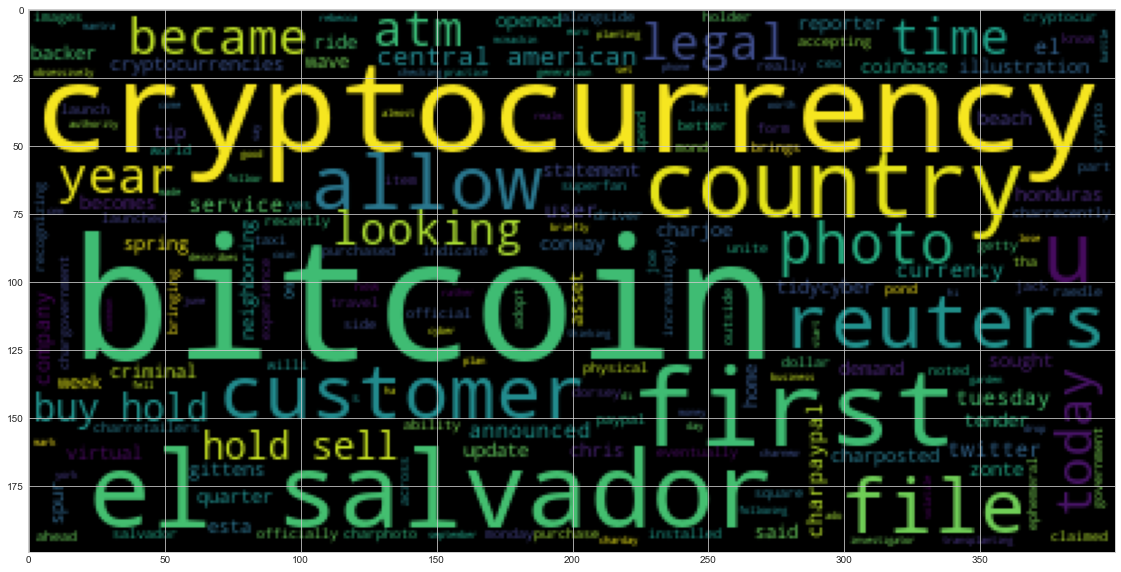

In [22]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE
tokenized_btc_list = []
for btc_tokens in btc_sentiment_df['Tokens']:
    tokenized_btc_list.append(" ".join(btc_tokens))
text = ""
for i in tokenized_btc_list:
    text += i
wc = WordCloud().generate(text)
plt.imshow(wc)

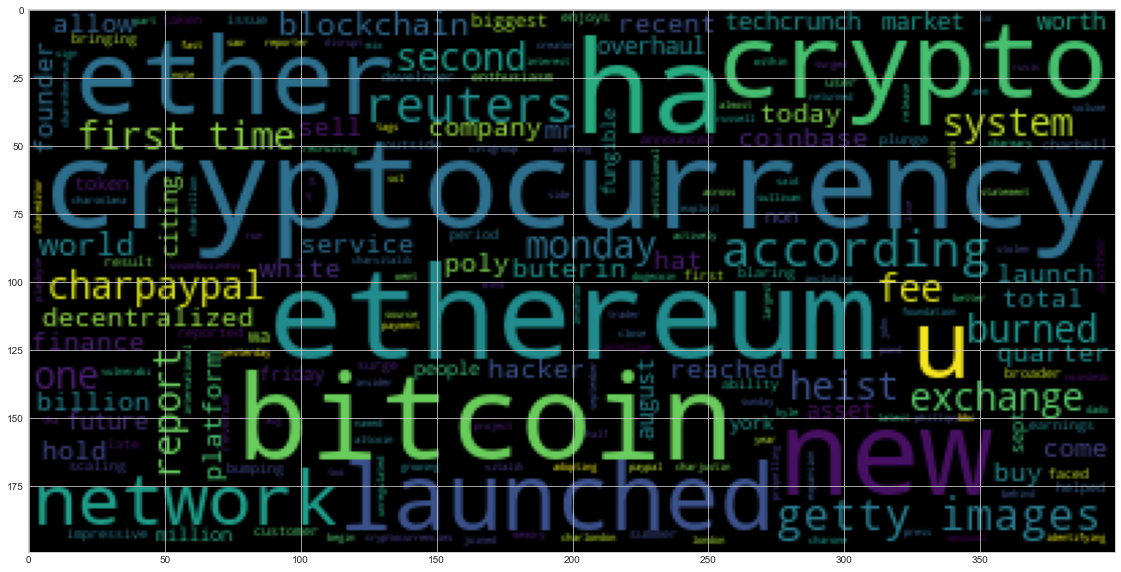

In [23]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
tokenized_eth_list = []
for eth_tokens in eth_sentiment_df['Tokens']:
    tokenized_eth_list.append(" ".join(eth_tokens))
text = ""
for i in tokenized_eth_list:
    text += i
wc = WordCloud().generate(text)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
concat_btc_text = ""
for text in btc_sentiment_df['Text']:
    concat_btc_text += text

In [28]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
NER_btc_doc = nlp(concat_btc_text)
# Add a title to the document
# YOUR CODE HERE!
NER_btc_doc.user_data["title"] = "BTC Name Entity Recognition"

In [29]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(NER_btc_doc, style ='ent')

In [30]:
# List all Entities
# YOUR CODE HERE!
[(x.text, x.label_) for x in NER_btc_doc.ents]

[('PayPal', 'ORG'),
 ('U.S.', 'GPE'),
 ('first', 'ORDINAL'),
 ('today', 'DATE'),
 ('U.K.', 'GPE'),
 ('Joe Raedle', 'PERSON'),
 ('Square', 'PERSON'),
 ('Jack Dorsey', 'PERSON'),
 ('Bitcoin', 'GPE'),
 ('Monday', 'DATE'),
 ('Mond', 'PERSON'),
 ('Bitcoin ATM', 'GPE'),
 ('today', 'DATE'),
 ('Bitcoin', 'GPE'),
 ('El Salvador', 'GPE'),
 ('US', 'GPE'),
 ('Central American', 'NORP'),
 ('first', 'ORDINAL'),
 ('El Salvador', 'GPE'),
 ('at least 200', 'CARDINAL'),
 ('bitcoin', 'GPE'),
 ('Tuesday', 'DATE'),
 ('a year', 'DATE'),
 ('US', 'GPE'),
 ('Joe', 'PERSON'),
 ('Chris', 'PERSON'),
 ('almost 2,500', 'CARDINAL'),
 ('2,100', 'MONEY'),
 ('Chris', 'PERSON'),
 ('Joe', 'PERSON'),
 ('CNN', 'ORG'),
 ('a volatile day', 'DATE'),
 ('bitcoin', 'GPE'),
 ('about 10%', 'PERCENT'),
 ('Tuesday', 'DATE'),
 ('$43,000 mark', 'MONEY'),
 ('El Salvador', 'GPE'),
 ('June', 'DATE'),
 ('ado', 'ORG'),
 ('chars]8', 'CARDINAL'),
 ('September', 'DATE'),
 ('spring', 'DATE'),
 ('Rebecca McMackin', 'PERSON'),
 ('Bitcoin', 'GPE'

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
concat_eth_text = ""
for text in eth_sentiment_df['Text']:
    concat_eth_text += text

In [32]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
NER_eth_doc = nlp(concat_eth_text)
# Add a title to the document
# YOUR CODE HERE!
NER_eth_doc.user_data["title"] = "ETH Name Entity Recognition"

In [33]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(NER_eth_doc, style ='ent')

In [34]:
# List all Entities
# YOUR CODE HERE!
[(x.text, x.label_) for x in NER_eth_doc.ents]

[('+3414 chars]PayPal', 'ORG'),
 ('U.S.', 'GPE'),
 ('first', 'ORDINAL'),
 ('today', 'DATE'),
 ('U.K.', 'GPE'),
 ('today', 'DATE'),
 ('Coinbase', 'ORG'),
 ('its second quarter', 'DATE'),
 ('the quarter', 'DATE'),
 ('Coinbase', 'ORG'),
 ('$2.23 billion', 'MONEY'),
 ('a year', 'DATE'),
 ('US', 'GPE'),
 ('Monday', 'DATE'),
 ('Poly Network', 'ORG'),
 ('White Hat', 'PERSON'),
 ('Buterin', 'PERSON'),
 ('TechCrunch', 'ORG'),
 ('2015', 'DATE'),
 ('John Phillips', 'PERSON'),
 ('TechCrunch', 'ORG'),
 ('Vitalik Buterin', 'PERSON'),
 ('the dogecoin foundation', 'ORG'),
 ('Sullivan/Getty Images\r\n', 'ORG'),
 ('CoinDesk', 'PERSON'),
 ('two', 'CARDINAL'),
 ('one', 'CARDINAL'),
 ('Mary-Ann RussonBusiness', 'PERSON'),
 ('BBC News', 'ORG'),
 ('one', 'CARDINAL'),
 ('almost half', 'CARDINAL'),
 ('$600m', 'MONEY'),
 ('£433m', 'MONEY'),
 ('Yesterday', 'DATE'),
 ('25', 'CARDINAL'),
 ('Reuters', 'ORG'),
 ('September', 'DATE'),
 ('chars]More than $144 million', 'MONEY'),
 ('August 5', 'DATE'),
 ('Sunday', 'DAT

---